In [8]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [39]:
def ReadTree(filename):
    return nx.read_gml(filename)


def DrawTree(G, root, idx, nnodes=20):
    # nnodes set to 20 to avoid drawing the whole tree
    # and cluttering the plot

    nodes = [root]
    print("Root: ", root)
    for k, v in idx.items():
        if v <= nnodes and v > 0:
            nodes.append(k)
    subGraph = G.subgraph(nodes)
    nx.draw(subGraph, with_labels=True, font_size=8, node_size=50)
    plt.show()


In [9]:
def BuildIndex(H):
    idx = {}
    counter = 0
    root = [n for n,d in H.in_degree() if d==0][0]
    for level in nx.bfs_layers(H, root):
        for node in level:
            if idx.get(node) is None:
                idx[node] = counter
                counter += 1
            else:
                raise Exception('Duplicate node in tree')
    return root, idx


In [3]:
def GetEdges(H, idx, root):
    edges = []
    for level in nx.bfs_edges(H, root):
        k, v = level
        edges.append((idx[k], idx[v]))
    return edges


In [42]:
def WriteEdges(fname, edges):
    with open(fname, 'w') as f:
        for edge in edges:
            f.write('{} {}\n'.format(edge[0], edge[1]))


def WriteMapping(fname, mapping):
    with open(fname, 'w') as f:
        for k, v in mapping.items():
            f.write('{} {}\n'.format(k, v))


Root:  *root*


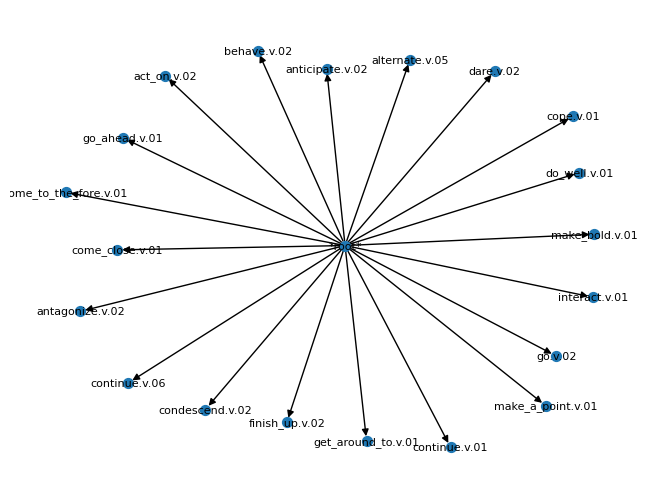

In [46]:
# Visualize the graph

H = ReadTree('data/graphs/small-wordnet.gml')
root, index = BuildIndex(H)
DrawTree(H, root, index)


In [43]:
edges = GetEdges(H, index, root)
WriteEdges('small-wordnet.edges', edges)
WriteMapping('small-wordnet.mapping', index)


Root:  entity.n.01


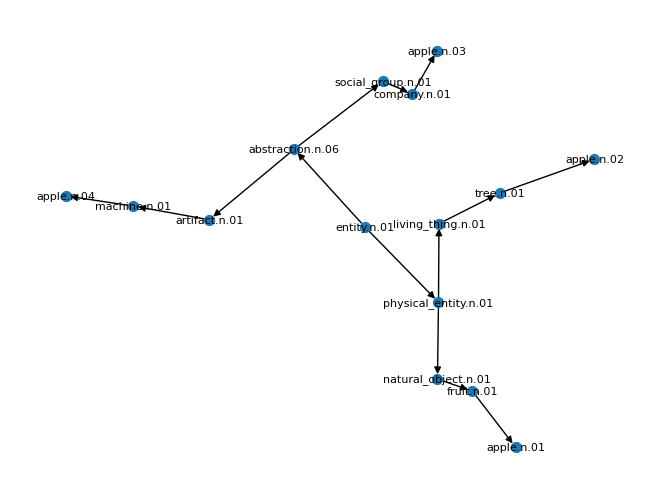

In [51]:
# Visualize the graph

AS = ReadTree('data/graphs/apple-senses.gml')
rAS, indexAS = BuildIndex(AS)
DrawTree(AS, rAS, indexAS)


In [ ]:
edgesAS = GetEdges(AS, indexAS, rAS)
WriteEdges('data/edges/apple-senses.edges', edgesAS)
WriteMapping('data/mappings/apple-senses.mapping', indexAS)
